###PHASE 1: Import & Load the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import files
files.upload()

df = pd.read_csv('IMDb Movies India.csv',  encoding='ISO-8859-1')
df

Saving IMDb Movies India.csv to IMDb Movies India (2).csv


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


###PHASE 2: Preprocessing – clean, fill, and encode

In [ ]:
# View data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# Check for summary statistics
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Mamta,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Show missing values count
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
# Drop rows where rating is missing
df = df.dropna(subset=['Rating'])

In [ ]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(1), object(9)
memory usage: 680.5+ KB


In [ ]:
# Fill 'Genre', 'Director', 'Actor 1/2/3' with 'Unknown'

df['Genre'].fillna('Unknown', inplace = True)
df['Director'].fillna('Unknown', inplace = True)
df['Actor 1'].fillna('Unknown', inplace = True)
df['Actor 2'].fillna('Unknown', inplace = True)
df['Actor 3'].fillna('Unknown', inplace = True)

In [ ]:
# Convert 'Year' to numeric (remove junk)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Check if the median is NaN, if so replace NaNs with a default value like 2000
if pd.isna(df['Year'].median()):
    df['Year'].fillna(2000, inplace=True)
else:
    df['Year'].fillna(df['Year'].median(), inplace=True)

# Convert to integer
df['Year'] = df['Year'].astype(int)


In [ ]:
# Convert 'Votes' to numeric (remove commas)
df['Votes'] = df['Votes'].str.replace(',', '')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'].fillna(df['Votes'].median(), inplace=True)

In [ ]:
# Drop Duration (too many missing values)
df.drop(columns=['Duration'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   int64  
 2   Genre     7919 non-null   object 
 3   Rating    7919 non-null   float64
 4   Votes     7919 non-null   int64  
 5   Director  7919 non-null   object 
 6   Actor 1   7919 non-null   object 
 7   Actor 2   7919 non-null   object 
 8   Actor 3   7919 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 618.7+ KB


###PHASE 3: Feature Engineering

In [ ]:
# Create a combined actor feature
df['Actors'] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']

# Drop individual actor columns
df.drop(columns=['Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [ ]:
df

,Name,Year,Genre,Rating,Votes,Director,Actors
1,#Gadhvi (He thought he was Gandhi),2000,Drama,7.0,8,Gaurav Bakshi,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
3,#Yaaram,2000,"Comedy, Romance",4.4,35,Ovais Khan,"Prateik, Ishita Raj, Siddhant Kapoor"
5,...Aur Pyaar Ho Gaya,2000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor"
6,...Yahaan,2000,"Drama, Romance, War",7.4,1086,Shoojit Sircar,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma"
8,?: A Question Mark,2000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,"Yash Dave, Muntazir Ahmad, Kiran Bhatia"
...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,2000,"Action, Crime, Drama",5.3,135,Bharat Rangachary,"Dharmendra, Moushumi Chatterjee, Govinda"
15503,Zulm Ki Zanjeer,2000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,"Chiranjeevi, Jayamalini, Rajinikanth"
15504,Zulm Ko Jala Doonga,2000,Action,4.6,11,Mahendra Shah,"Naseeruddin Shah, Sumeet Saigal, Suparna Anand"
15505,Zulmi,2000,"Action, Drama",4.5,655,Kuku Kohli,"Akshay Kumar, Twinkle Khanna, Aruna Irani"


In [ ]:
# Select features
features = ['Genre', 'Director', 'Actors', 'Year', 'Votes']
target = 'Rating'

df_model = df[features + [target]].copy()


In [ ]:
# Limit high-cardinality categorical variables to top 20 most frequent
def limit_categories(series, top_n=20):
    top = series.value_counts().nlargest(top_n).index
    return series.apply(lambda x: x if x in top else 'Other')

df_model['Genre'] = limit_categories(df_model['Genre'], 15)
df_model['Director'] = limit_categories(df_model['Director'], 15)
df_model['Actors'] = limit_categories(df_model['Actors'], 15)


In [ ]:
df_encoded = pd.get_dummies(df_model, columns=['Genre', 'Director', 'Actors'], drop_first=True)


###PHASE 4: Model Training & Evaluation

In [ ]:
X = df_encoded.drop('Rating', axis=1)
y = df_encoded['Rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² Score (XGBoost): {r2:.4f}")
print(f"Root Mean Squared Error (XGBoost): {rmse:.4f}")


R² Score (XGBoost): 0.1326
Root Mean Squared Error (XGBoost): 1.2699


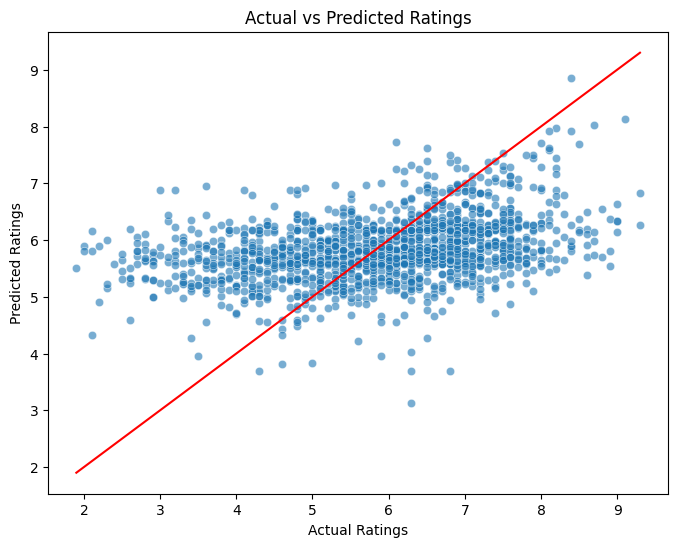

In [ ]:
# Actual vs Predicted

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


In [ ]:
# 👇 Sample new movie data (adjust values as needed)
new_movie = {
    'Year': 2023,
    'Votes': 20000,
    'Genre': 'Drama',
    'Director': 'Rajkumar Hirani',
    'Actors': 'Aamir Khan, Kareena Kapoor, Boman Irani',
    'Num_Actors': 3,
    'Director_AvgRating': 7.8   # Optional: get from training data
}

# Convert to DataFrame
new_df = pd.DataFrame([new_movie])


In [ ]:
# Keep only top categories (same used during training)
top_genres = df['Genre'].value_counts().nlargest(15).index
top_directors = df['Director'].value_counts().nlargest(15).index
top_actors = df_model['Actors'].value_counts().nlargest(15).index

# Apply category limits
new_df['Genre'] = new_df['Genre'].apply(lambda x: x if x in top_genres else 'Other')
new_df['Director'] = new_df['Director'].apply(lambda x: x if x in top_directors else 'Other')
new_df['Actors'] = new_df['Actors'].apply(lambda x: x if x in top_actors else 'Other')

# One-hot encode
new_encoded = pd.get_dummies(new_df, columns=['Genre', 'Director', 'Actors'], drop_first=True)

# Align with training data columns
for col in X.columns:
    if col not in new_encoded.columns:
        new_encoded[col] = 0

new_encoded = new_encoded[X.columns]  # Reorder columns

# 🎯 Predict rating
predicted_rating = xgb_model.predict(new_encoded)[0]
print(f"🎬 Predicted IMDb Rating: {predicted_rating:.2f}")


🎬 Predicted IMDb Rating: 6.67
